<a href="https://colab.research.google.com/github/Tim-Ganther/DeepLearning/blob/master/nltk/Google_Word2Vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Function to download files from google drive

import requests

def download_file_from_google_drive(id, destination):
    URL = "https://docs.google.com/uc?export=download"

    session = requests.Session()

    response = session.get(URL, params = { 'id' : id }, stream = True)
    token = get_confirm_token(response)

    if token:
        params = { 'id' : id, 'confirm' : token }
        response = session.get(URL, params = params, stream = True)

    save_response_content(response, destination)    

def get_confirm_token(response):
    for key, value in response.cookies.items():
        if key.startswith('download_warning'):
            return value

    return None

def save_response_content(response, destination):
    CHUNK_SIZE = 32768

    with open(destination, "wb") as f:
        for chunk in response.iter_content(CHUNK_SIZE):
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)

In [0]:
# Specify the file to download and run the download function
file_id = '0B7XkCwpI5KDYNlNUTTlSS21pQmM'
destination = 'GoogleNews-vectors-negative300.bin.gz'
download_file_from_google_drive(file_id, destination)

In [0]:
import gzip
import shutil

# unzip file
with gzip.open('GoogleNews-vectors-negative300.bin.gz', 'rb') as f_in:
    with open('GoogleNews-vectors-negative300.bin', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

In [5]:
import gensim

# Load Google's pre-trained Word2Vec model.
model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:410: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
# Receive n(top) simular words to a given word

word = "Linux"
top = 5
model.most_similar(word, topn=top)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('GNU_Linux', 0.8066874742507935),
 ('Linux_OS', 0.7511820793151855),
 ('Unix', 0.7434293627738953),
 ('Ubuntu_Linux', 0.7404977083206177),
 ('Red_Hat_Linux', 0.7402560710906982)]

In [0]:
import numpy as np
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# function to format the data for plots
def genPlotData(words,dimension):
  word_vectors = []

  for word in words:
    word_vectors.append(model[word].tolist())

  word_vectors = np.array(word_vectors,dtype=np.float32)
  pca = PCA(n_components=dimension)
  result = pca.fit_transform(word_vectors)
  return result

# function to plot given list of words in a scatter plot (2D) matching their vectors
def words2plot2D(words):

  result = genPlotData(words,2)

  plt.scatter(result[:, 0], result[:, 1])

  for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
  
  plt.show()

# function to plot given list of words in a scatter plot (3D) matching their vectors
def words2plot3D(words):
  result = genPlotData(words,3)

  fig = plt.figure()
  ax = Axes3D(fig)
  ax.scatter(result[:, 0], result[:, 1], result[:, 2])

  for i, word in enumerate(words):
    ax.text(result[i,0],result[i,1],result[i,2],  '%s' % (word), size=10, zorder=1,color='k')

  plt.show()

In [0]:
# function to format the data for HeatMaps
def genHeatData(words):
  h = []
  for i in range(len(words)):
    t = []
    for j in range(len(words)):
      t.append(model.similarity(words[i], words[j]))
    h.append(t)
  return np.asarray(h)

# function to plot given list of words in a heatmap (2D) matching their vectors
def words2heatmap2D(words):
  values = genHeatData(words)

  fig, ax = plt.subplots()

  # We want to show all ticks...
  ax.set_xticks(np.arange(len(words)))
  ax.set_yticks(np.arange(len(words)))
  # ... and label them with the respective list entries
  ax.set_xticklabels(words)
  ax.set_yticklabels(words)

  plt.xticks(np.arange(0.5, len(words), 1))
  plt.yticks(np.arange(0.5, len(words), 1))

  # Rotate the tick labels and set their alignment.
  plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
          rotation_mode="anchor")

  plt.pcolor(values, cmap=plt.cm.hot, vmin=-1, vmax=1)
  plt.colorbar()

  plt.show()

In [0]:
# define the list of words
word_list = ['Telekom','Informatics','Computer', 'PC','Electronics','Cloud', 'Unix','DIH']

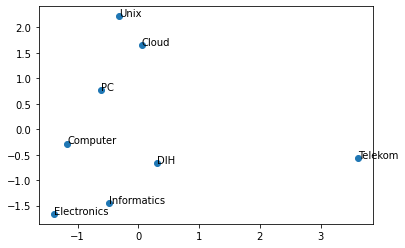

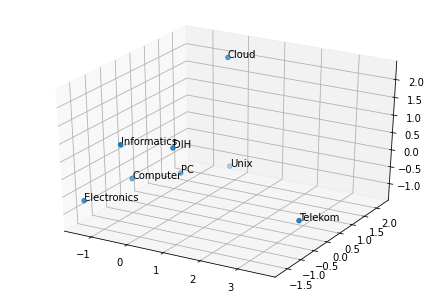

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


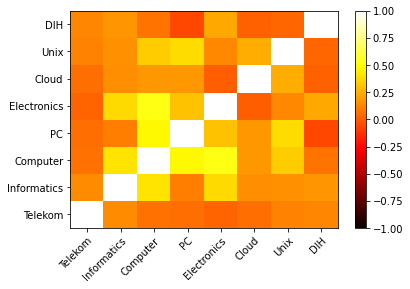

In [15]:
words2plot2D(word_list)
words2plot3D(word_list)
words2heatmap2D(word_list)